[link to map](https://www.mapcustomizer.com/map/local_rss_news)
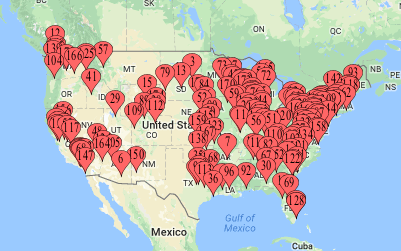

In [1]:
import re
import pandas as pd
from tqdm import tqdm
from dbWrapper import dbWrapper
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [2]:
db = dbWrapper()

In [6]:
ln = db.execute("SELECT * FROM local_news")

In [ ]:
a = db.execute("SELECT * FROM rss_articles")

In [ ]:
import hashlib
def getHash(val):
    return int(hashlib.sha1(val.encode('utf-8')).hexdigest(), 16)  % 2**64 

In [353]:
a['new_id'] = a.apply(lambda x: utils.hash(x['pub_name'] + x['headline']), axis=1)

In [352]:
import utils

In [351]:
a['new_id'] = a.apply()

,headline,pub_date,description,link,pub_name,pub_id,id,new_id
0,Naked passenger forces plane back to Anchorage,2018-02-08 05:04:00,"ANCHORAGE, Alaska (AP) - An Alaska Airlines fl...",http://www.newsminer.com/news/alaska_news/nake...,Fairbanks Daily News-Miner,1,2860243534803648616,13777098246758209438
1,"Moore wins ""poke of gold"" as first Yukon Quest...",2018-02-08 04:51:00,"DAWSON CITY, Yukon — The gold belongs to Allen...",http://www.newsminer.com/mushing/yukon_quest/m...,Fairbanks Daily News-Miner,1,7066559997266844893,6760787344615083082
2,"The doctor's in, but jury is out on new LA Tim...",2018-02-08 04:42:04,LOS ANGELES (AP) — The struggling Los Angeles ...,http://www.newsminer.com/features/strange_news...,Fairbanks Daily News-Miner,1,330757184918006402,6902808978532841778
3,Force of librarians,2018-02-08 03:44:00,Fairbanks Daily News-Miner letter to the editor:,http://www.newsminer.com/opinion/letters_to_ed...,Fairbanks Daily News-Miner,1,3285272288755045334,10816662036015530249
4,Observing Black History Month,2018-02-08 03:43:00,Fairbanks Daily News-Miner editorial:,http://www.newsminer.com/opinion/editorials/ob...,Fairbanks Daily News-Miner,1,6697380932919242317,13882548713208554373
5,Let’s continue giving a helping hand to Alaska...,2018-02-08 03:45:00,Fairbanks Daily News-Miner community perspective:,http://www.newsminer.com/opinion/community_per...,Fairbanks Daily News-Miner,1,7330617361191496852,2235053334168533306
6,"St. John's tops Nova, first win over No. 1 tea...",2018-02-08 03:31:24,PHILADELPHIA (AP) — St. John's watched a despe...,http://www.newsminer.com/st-john-s-tops-nova-f...,Fairbanks Daily News-Miner,1,2321110320906613933,2475462904628143982
7,"Propane heater fire kills dog, displaces four ...",2018-02-08 02:32:00,FAIRBANKS—A fire sparked by a propane heater d...,http://www.newsminer.com/news/local_news/propa...,Fairbanks Daily News-Miner,1,6548043239999142171,6205278023389508867
8,10 Things to Know for Thursday,2018-02-08 01:12:07,"Your daily look at late-breaking news, upcomin...",http://www.newsminer.com/things-to-know-for-th...,Fairbanks Daily News-Miner,1,5895935464135083377,7519609862456699979
9,"Jury convicts man who shot at Alaska officers,...",2018-02-08 00:53:36,"ANCHORAGE, Alaska (AP) — A man who fired shots...",http://www.newsminer.com/news/alaska_news/jury...,Fairbanks Daily News-Miner,1,4079461046356818557,13839628597122053530


In [276]:
x = a[a.duplicated('headline', keep=False)].sort_values(['headline', 'pub_date'])

In [220]:
articles = db.execute("""
    SELECT * FROM rss_articles ra JOIN local_news ln ON ra.pub_id=ln.id
""")

In [222]:
articles['is_ap'] = articles['description'].map(lambda x: 'AP' in x)

In [223]:
# Get the corpus from all the headlines
corpus = [x.lower() for x in word_tokenize(' '.join(articles['headline'])) if not x in stopwords and len(x) > 1]
freq_dist = nltk.FreqDist(corpus)
freq_dist_pd = pd.DataFrame(list(zip(freq_dist.keys(), freq_dist.values())), columns=['word', 'freq'])

In [228]:
freq_dist_pd = freq_dist_pd[freq_dist_pd.freq >= 10]
freq_dist_pd['freq'] = freq_dist_pd['freq'] / len(corpus) * 100

/home/dale/.virtualenvs/local_news/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [230]:
freq_dist_pd.to_pickle('freq_dist_pd.pkl')

In [231]:
def headlineFromDf(df):
    return [x.lower() for x in word_tokenize(' '.join(df['headline'])) if not x in stopwords and len(x) > 1]

In [232]:
state_freqs = {}
for state in articles.groupby('state_code'):
    if state[0][0] == 'A':
        state_freqs[state[0]] = nltk.FreqDist(headlineFromDf(state[1]))

In [240]:
def compareFreqs(freqs, name='other'):
    df = pd.DataFrame(freq_dist_pd)
    total_words = sum(freqs.values())
    df[name] = df['word'].map(lambda x: freqs[x] / total_words if x in freqs else 0)
    df['diff'] = df[name] - df['freq']
    df['count'] = df['word'].map(lambda x: freqs[x] if x in freqs else 0)
    return df.sort_values('diff', ascending=False)

In [241]:
compareFreqs(state_freqs['AZ'])

,word,freq,other,diff,count
8626,kornukopia,0.000564,0.000268,-0.000296,10
4729,pistas,0.000564,0.000268,-0.000296,10
12856,mcc,0.000564,0.000268,-0.000296,10
6818,decapitation,0.000564,0.000241,-0.000323,9
18501,garry,0.000564,0.000241,-0.000323,9
15111,docs,0.000564,0.000241,-0.000323,9
7349,16-25,0.000621,0.000268,-0.000353,10
68,yavapai,0.000677,0.000322,-0.000356,12
6084,kusd,0.000677,0.000322,-0.000356,12
6396,description,0.000621,0.000241,-0.000380,9


In [45]:
# x = [x.lower() for x in word_tokenize(' '.join(articles[~articles.is_ap]['headline'])) if not x in stopwords and len(x) > 1]
# non_ap_freq_dist = nltk.FreqDist(x)
# non_ap_freq_dist.most_common()

In [148]:
def getInstances(word, is_ap=False):
    return articles[articles['headline'].map(lambda x: word in x.lower())]

In [242]:
temp = getInstances('kornukopia').query("state_code == 'AZ'")

In [169]:
temp.apply(lambda x: hash(x['pub_name'] + x['headline']) + sys.maxsize, axis=1)

11942    16123130876727248005
15755    16123130876727248005
24970    16123130876727248005
dtype: uint64

In [160]:
hash("Syria confirms rare US airstrike on pro-government forces")

-3178759149303587803

In [68]:
stabbing = getInstances('stabbing')